In [ ]:
import numpy as np
import matplotlib.pyplot as plt

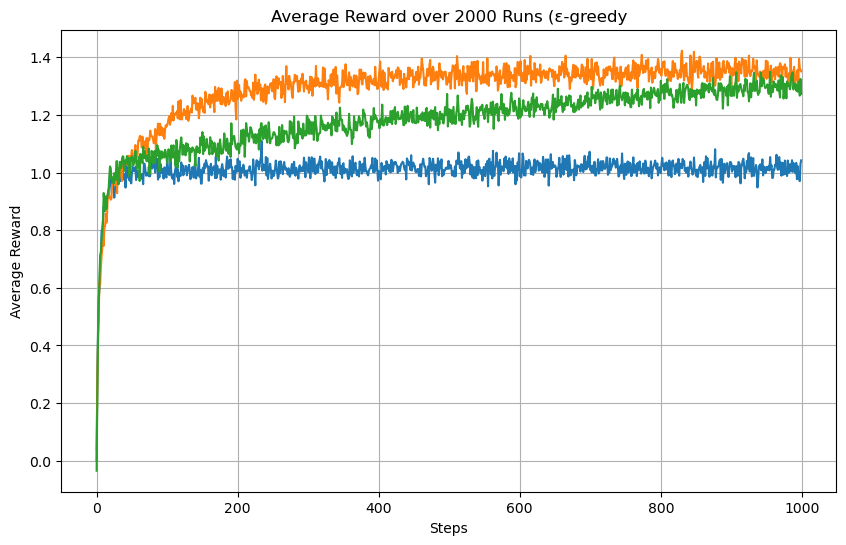

In [6]:
class TenArmBandit:
    def __init__(self, n_arms=10):
        self.n_arms = n_arms
        self.true_rewards = np.random.normal(0, 1, n_arms)
        
    def pull(self, arm):
        return np.random.normal(self.true_rewards[arm], 1)

def epsilon_greedy(epsilon, n_arms):
    q_values = np.zeros(n_arms)
    n_pulls = np.zeros(n_arms)
    
    def choose_action():
        if np.random.random() < epsilon:
            return np.random.randint(n_arms)
        else:
            return np.argmax(q_values)
    
    return choose_action, q_values, n_pulls

def run_experiment(n_runs=2000, n_steps=1000, epsilon=0.1):
    bandit = TenArmBandit()
    choose_action, q_values, n_pulls = epsilon_greedy(epsilon, bandit.n_arms)
    rewards = np.zeros(n_steps)
    
    for step in range(n_steps):
        action = choose_action()
        reward = bandit.pull(action)
        rewards[step] = reward
        
        n_pulls[action] += 1
        q_values[action] += (reward - q_values[action]) / n_pulls[action]
    
    return rewards

def main():
    n_runs = 2000
    n_steps = 1000
    
    rewards_epsilon_0 = np.zeros((n_runs, n_steps))
    rewards_epsilon_10_percent = np.zeros((n_runs, n_steps))
    rewards_epsilon_1_percent = np.zeros((n_runs, n_steps))

    
    for run in range(n_runs):
        rewards_epsilon_0[run] = run_experiment(n_steps=n_steps, epsilon=0)
        rewards_epsilon_10_percent[run] = run_experiment(n_steps=n_steps, epsilon=0.1)
        rewards_epsilon_1_percent[run] = run_experiment(n_steps=n_steps, epsilon=0.01)
    
    average_rewards_0 = np.mean(rewards_epsilon_0, axis=0)
    average_rewards_01 = np.mean(rewards_epsilon_10_percent, axis=0)
    average_rewards_001 = np.mean(rewards_epsilon_1_percent, axis=0)
    
    plt.figure(figsize=(10, 6))
    plt.plot(average_rewards_0)
    plt.plot(average_rewards_01)
    plt.plot(average_rewards_001)
    plt.title(f'Average Reward over {n_runs} Runs (ε-greedy')
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()

In [10]:
import numpy as np
print(np.ones(10) * 0)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
